In [1]:
import pandas as pd
import os
import numpy as np

In [9]:
raw_root = os.path.join(os.path.dirname(os.getcwd()), 'raw')

In [17]:
df = pd.read_csv(os.path.join(raw_root, 'brist1d', 'train.csv'), encoding = 'utf-8-sig')

/var/folders/8g/_dzxhc2n0gd7gd_s_lbkz36r0000gn/T/ipykernel_59706/3533119182.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(raw_root, 'brist1d', 'train.csv'), encoding = 'utf-8-sig')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [ ]:
chars = ['bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-0:10', 'insulin-0:05','insulin-0:00', 'carbs-0:10', 'carbs-0:05', 'carbs-0:00',
         'activity-0:10', 'activity-0:05', 'activity-0:00', 'cals-0:10', 'cals-0:05', 'cals-0:00', 'steps-0:10', 'steps-0:05', 'steps-0:00']

In [35]:
df_shed = df[[*chars]]

In [36]:
df_shed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   bg-0:10        151202 non-null  float64
 1   bg-0:05        152586 non-null  float64
 2   bg-0:00        174328 non-null  float64
 3   insulin-0:10   167647 non-null  float64
 4   insulin-0:05   167648 non-null  float64
 5   insulin-0:00   167649 non-null  float64
 6   carbs-0:10     2543 non-null    float64
 7   carbs-0:05     2562 non-null    float64
 8   carbs-0:00     2583 non-null    float64
 9   activity-0:10  2737 non-null    object 
 10  activity-0:05  2753 non-null    object 
 11  activity-0:00  2737 non-null    object 
 12  cals-0:10      141751 non-null  float64
 13  cals-0:05      141761 non-null  float64
 14  cals-0:00      141767 non-null  float64
 15  steps-0:10     82030 non-null   float64
 16  steps-0:05     81857 non-null   float64
 17  steps-0:00     81940 non-null

In [43]:
df_shed['bg-0:00'].isna().sum()

2696

In [95]:
df_insulin = np.max(pd.concat([df_shed['insulin-0:00'],df_shed['insulin-0:05'], df_shed['insulin-0:10']], axis = 1), axis = 1)

In [98]:
df_subject = df['p_num']
df_timepoint = df['time']
df_bg = df_shed['bg-0:00'].fillna(df_shed['bg-0:05']).fillna(df_shed['bg-0:10']).dropna()
df_insulin = np.max(pd.concat([df_shed['insulin-0:00'],df_shed['insulin-0:05'], df_shed['insulin-0:10']], axis = 1), axis = 1)
df_activity = df_shed['activity-0:00'].fillna(df_shed['activity-0:05']).fillna(df_shed['activity-0:10']).dropna()
df_cals = df_shed['cals-0:00'].fillna(df_shed['cals-0:05']).fillna(df_shed['cals-0:10']).dropna()
df_steps = df_shed['steps-0:00'].fillna(df_shed['steps-0:05']).fillna(df_shed['steps-0:10']).dropna()

In [99]:
df_new = pd.concat([df_subject, df_timepoint, df_bg, df_insulin, df_activity, df_cals, df_steps], axis = 1, join = 'outer')

In [100]:
df_new.columns = ['subject', 'timepoint', 'bg', 'insulin', 'activity', 'cals', 'steps']

In [101]:
df_new.to_csv('./../proc/cgm_proc.csv', encoding = 'utf-8-sig')

In [102]:
print(f'average of glucose level: {np.mean(df_new["bg"])}, standard deviation of glucose level: {np.std(df_new["bg"])}')
print(f'average of glucose level: {np.mean(df_new["insulin"])}, standard deviation of glucose level: {np.std(df_new["insulin"])}')
bg = df_new['bg'].fillna(np.mean(df_new['bg']))
insulin = df_new['insulin'].fillna(np.mean(df_new['insulin']))

average of glucose level: 8.278754851431136, standard deviation of glucose level: 2.996951156065397
average of glucose level: 0.4386446039689593, standard deviation of glucose level: 1.7293667731694664


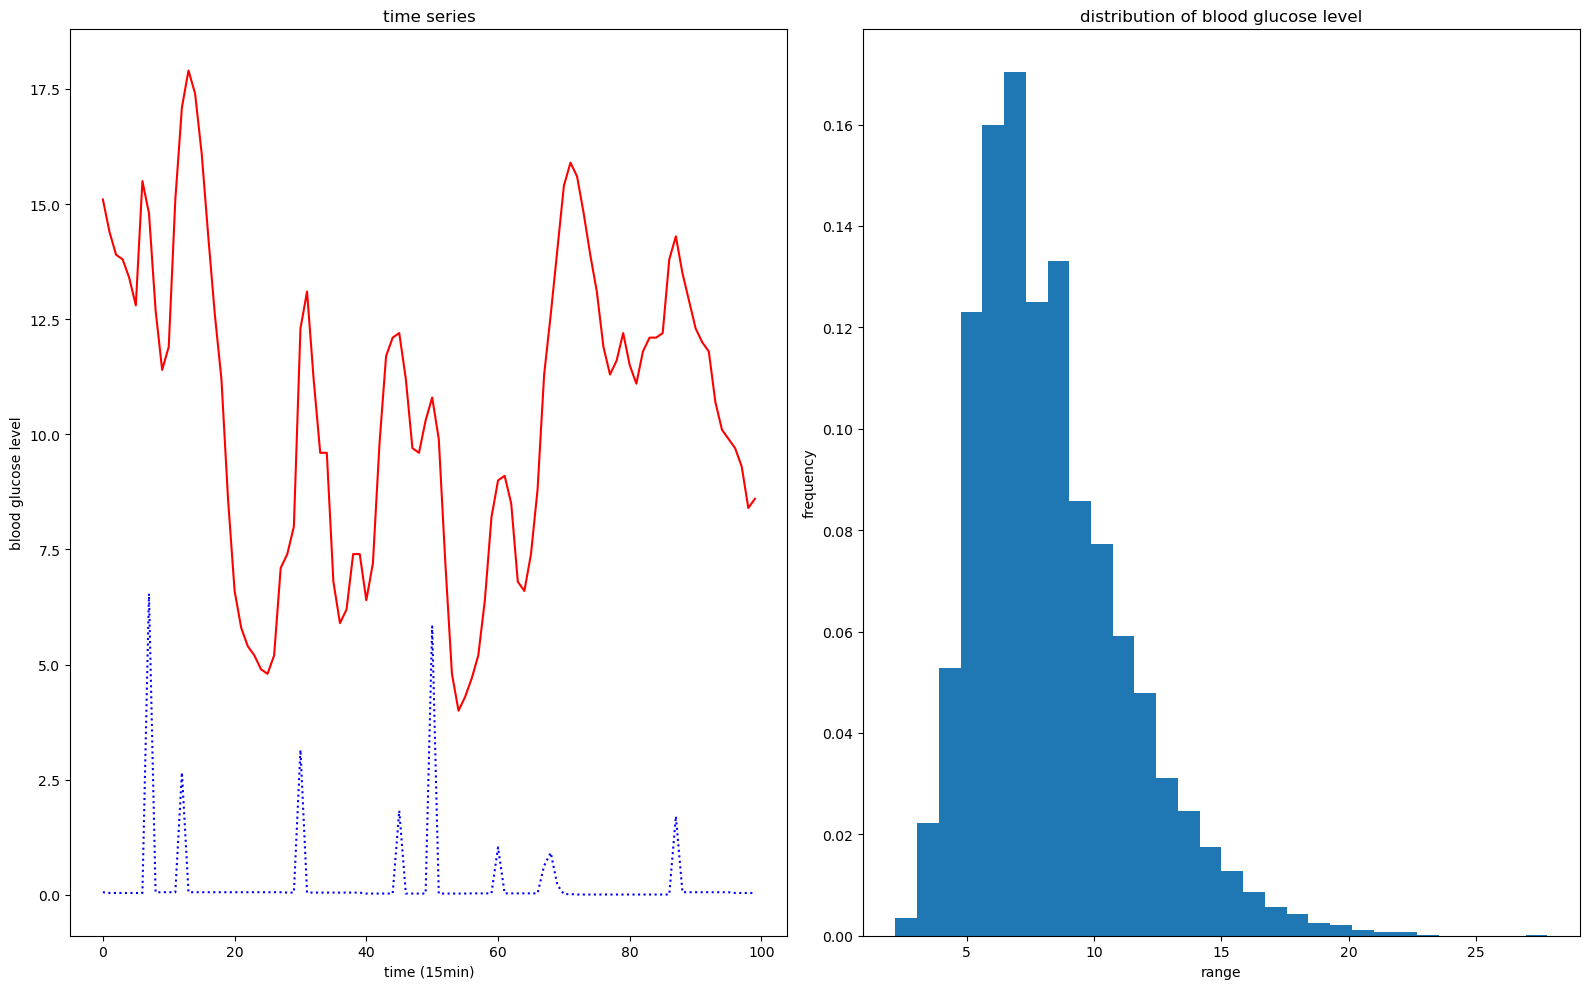

In [105]:
import matplotlib.pyplot as plt

timesteps = np.arange(0,len(df_new['timepoint']))
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (16,10))
axes[0].plot(timesteps[:100], bg[:100], color = 'red')
axes[0].plot(timesteps[:100], insulin[:100], color = 'blue', linestyle = ':')
axes[0].set_title('time series')
axes[0].set_xlabel('time (15min)')
axes[0].set_ylabel('blood glucose level')

axes[1].hist(bg, bins = 30, density = True)
axes[1].set_title('distribution of blood glucose level')
axes[1].set_xlabel('range')
axes[1].set_ylabel('frequency')

plt.tight_layout()
plt.show()

In [107]:
df['bg'] = df_new['bg']
df['insulin'] = df_new['insulin']

In [110]:
df.to_csv('./../proc/cgm_proc_bgins_only.csv', encoding = 'utf-8-sig')